In [203]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import datasets

plt.style.use('ggplot')

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")

In [204]:
#df = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
df =pd.read_csv('Advertising.csv')
display(df.head())

# Instantiate and fit our model.






,TV,Radio,Newspaper,Sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [205]:
type(df)

pandas.core.frame.DataFrame

In [206]:
print(data.keys())

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales', 'Radio2', 'TV2',
       'Newspaper2'],
      dtype='object')


C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ADD694BA8>,
      dtype=object)

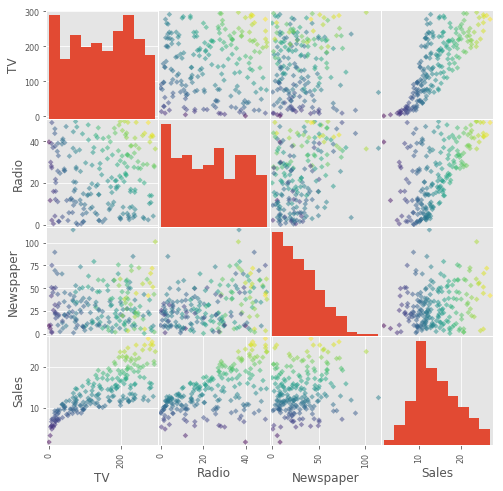

In [207]:
y= df['Sales']
pd.scatter_matrix(df, c=y, figsize=[8,8], s=15, marker ='D')

In [228]:
df['Radio2'] = df.Radio**2

df['TV2'] = df.TV**2

df['Newspaper2'] = df.Newspaper**2

df['Newspaperlog']= np.log(df['Newspaper'])

df['Radiolog'] = np.log(df['Radio'])

df['TVlog'] = np.log(df['TV'])

regr = linear_model.LinearRegression()
Y = df['Sales'].values.reshape(-1, 1)
X = df[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
# \n prints whatever is after "\n"
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', (regr.score(X,Y)))
#print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared: 
 0.8972106381789521


C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [231]:
df['Radio2'] = df.Radio**2

df['TV2'] = df.TV**2

df['Newspaper2'] = df.Newspaper**2

df['Newspaperlog']= np.log(df['Newspaper'])

df['Radiolog'] = np.log(df['Radio'])

df['TVlog'] = np.log(df['TV'])

regr = linear_model.LinearRegression()
Y = df['Sales'].values.reshape(-1, 1)
X = df[['TVlog','Radio','Newspaperlog']]
regr.fit(X, Y)

# Inspect the results.
# \n prints whatever is after "\n"
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', (regr.score(X,Y)))
#print(regr.score(X, Y))


Coefficients: 
 [[ 3.94182583  0.20773944 -0.15120816]]

Intercept: 
 [-8.76166656]

R-squared: 
 0.9073225228415533


C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [209]:
df.head()

,TV,Radio,Newspaper,Sales,Radio2,TV2,Newspaper2,Newspaperlog,Radiolog,TVlog
0,230.100,37.800,69.200,22.100,1428.840,52946.010,4788.640,4.237,3.632,5.439
1,44.500,39.300,45.100,10.400,1544.490,1980.250,2034.010,3.809,3.671,3.795
2,17.200,45.900,69.300,9.300,2106.810,295.840,4802.490,4.238,3.826,2.845
3,151.500,41.300,58.500,18.500,1705.690,22952.250,3422.250,4.069,3.721,5.021
4,180.800,10.800,58.400,12.900,116.640,32688.640,3410.560,4.067,2.380,5.197


In [219]:
#df=data.drop("Unnamed: O")

In [220]:
#print('\nCoefficients: \n', regr.coef_)
#print('\nIntercept: \n', regr.intercept_)
#print('\nR-squared: \n', (regr.score(X,Y)))
#print(regr.score(X, Y))

In [221]:
print('\nCoefficients:')
print (regr.coef_)


Coefficients:
[[ 4.57923391e-02  1.90081305e-01 -4.74657086e-05]]


In [222]:
#Y = df['Sales']
#X = df[['TV','Radio','Newspaper2']]

In [224]:

#Y = df['Sales']
#X = df[['TV','Radio','Newspaper2']]
#pd.scatter_matrix(df, c=Y, figsize=[8,8], s=15, marker ='D')

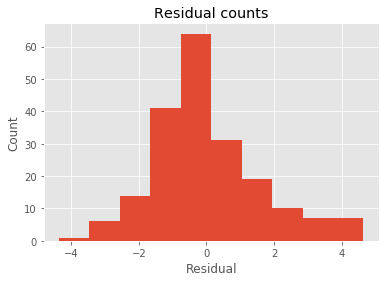

In [232]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

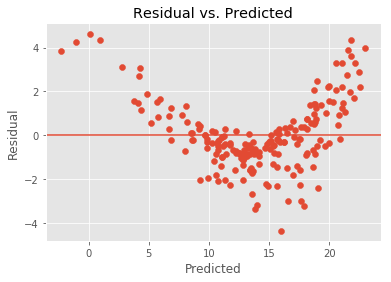

In [233]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [234]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TVlog,Radio,Newspaperlog
TVlog,1.000,-0.011,0.053
Radio,-0.011,1.000,0.237
Newspaperlog,0.053,0.237,1.000


In [238]:
df['Radio2'] = df.Radio**2

df['TV2'] = df.TV**2

df['Newspaper2'] = df.Newspaper**3

df['Newspaperlog']= np.log(df['Newspaper'])

df['Radiolog'] = np.log(df['Radio'])

df['TVlog'] = np.log(df['TV'])

regr = linear_model.LinearRegression()
Y = df['Sales'].values.reshape(-1, 1)
X = df[['TV','Radio','Newspaper2']]
regr.fit(X, Y)

# Inspect the results.
# \n prints whatever is after "\n"
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', (regr.score(X,Y)))
#print(regr.score(X, Y))


Coefficients: 
 [[ 4.57856833e-02  1.90260382e-01 -6.85210348e-07]]

Intercept: 
 [2.91926531]

R-squared: 
 0.897629814938316


C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


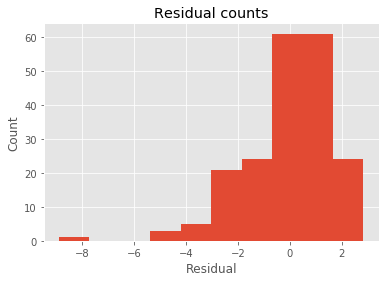

In [239]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

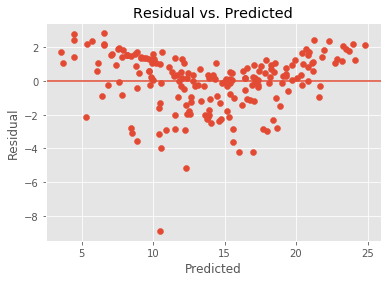

In [240]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()